## Day 11

In [2]:
# all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use('ggplot')

In [4]:
# reading in first dataset
df1 = pd.read_csv('./GhanaHealth/health-facilities-gh.csv')
df1.head(10)

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098
5,Ashanti,Offinso North,Aboffour Health Centre,Health Centre,Aboffour,Government,7.12986,-1.73294
6,Ashanti,Atwima-Nwabiagya,Abuakwa Maternity Home,Maternity Home,Abuakwa,Private,7.00000,-2.00000
7,Ashanti,Atwima-Kwanwoma,Aburaso Methodist clinic,Clinic,Aburaso,CHAG,6.66133,-1.67662
8,Ashanti,Ejisu-Juaben Municipal,Achiase Health Centre,Health Centre,Achiase,Government,6.45543,-1.31004
9,Ashanti,Mampong Municipal,Adidwan Health Centre,Health Centre,Adidwan,Government,7.25163,-1.40278


In [5]:
# number of rows and columns of dataset
df1.shape

(3756, 8)

In [6]:
# summary statistics of categorical variables
df1.describe(exclude=[np.number])

,Region,District,FacilityName,Type,Town,Ownership
count,3756,3756,3756,3756,3603,3756
unique,10,171,3544,25,2446,12
top,Ashanti,Accra Metropolitan,Rabito Clinic,Clinic,Sunyani,Government
freq,658,277,11,1171,29,2210


## Number of Health Facilities in each Region of Ghana

In [7]:
facility_counts = df1['Region'].value_counts()
facility_counts

Ashanti          658
Greater Accra    504
Western          496
Volta            398
Eastern          393
Brong Ahafo      348
Central          299
Northern         267
Upper East       232
Upper West       161
Name: Region, dtype: int64

In [8]:
x = facility_counts.index
x_height = facility_counts.values

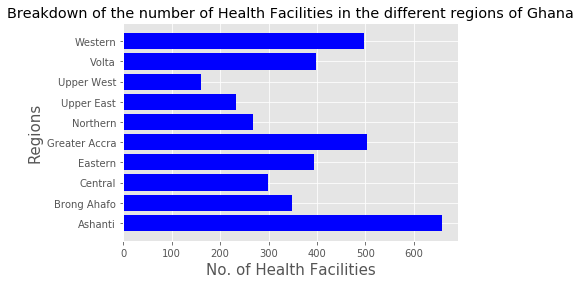

In [52]:
## Bar graph showing breakdown of health facilities in Ghana

plt.barh(x, x_height, color='blue')
plt.xlabel('No. of Health Facilities', fontsize=15)
plt.ylabel('Regions', fontsize=15)
plt.title('Breakdown of the number of Health Facilities in the different regions of Ghana')
plt.show()

## Types of Health Facilities in Ghana

In [14]:
#converting all values in Type column to lowercase
df1['Type'] = df1['Type'].str.lower() 

In [20]:
#putting the different types of hospitals together
for i in range(len(df1)):  
    if 'hospital' in df1['Type'].iloc[i]:
        df1.loc[i, 'Type'] = 'hospital'



In [24]:
#putting the different types of directorates together
for i in range(len(df1)):  
    if 'health directorate' in df1['Type'].iloc[i]:
        df1.loc[i, 'Type'] = 'health directorate'

In [32]:
facility_types_counts = df1['Type'].value_counts()
facility_types_counts

clinic                  1173
health centre            786
chps                     652
hospital                 379
maternity home           369
rch                      152
health directorate       118
training institution      74
others                    31
polyclinic                16
research institution       2
centre                     2
cphs                       1
dhd                        1
Name: Type, dtype: int64

In [33]:
y = facility_types_counts.index
y_height = facility_types_counts.values

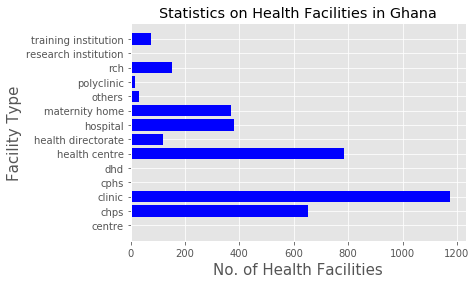

In [53]:
## Bar graph showing breakdown of health facilities in Ghana
plt.barh(y, y_height, color='blue')
plt.xlabel('No. of Health Facilities', fontsize=15)
plt.ylabel('Facility Type', fontsize=15)
plt.title('Statistics on Health Facilities in Ghana')
plt.show()

**Comment: There are more clinics in Ghana than any other type of health facility.**

# Dataset 2

In [35]:
# reading in dataset
df2 = pd.read_csv('./GhanaHealth/health-facility-tiers.csv')
df2.head(10)

,Region,Facility,Tier
0,Ashanti,PEACE AND LOVE HOSPITAL,2
1,Ashanti,TODAH HOSPITAL,2
2,Ashanti,ASOKWA CHILREN'S HOSPITAL,2
3,Ashanti,FANKYEBEBRA HOSPITAL,2
4,Ashanti,MICHMIT HOSPITAL,2
5,Ashanti,SABS HOSPITAL,2
6,Ashanti,SARFO ADU MEMORIAL HOSPITAL,2
7,Ashanti,CITY HOSPITAL,2
8,Ashanti,AYUSH MEMORIAL HOSPITAL LTD,2
9,Ashanti,ROYAL PLACE HOSPITAL,2


In [18]:
# finding number of rows and columns in this dataset
df2.shape

(1475, 3)

In [42]:
df2.dtypes

Region      object
Facility    object
Tier         int64
dtype: object

In [47]:
# summary statistics of categorical variables
df2.describe(exclude=[np.number])

,Region,Facility
count,1475,1475
unique,10,1446
top,Greater Accra,MARIE STOPES INTERNATIONAL
freq,533,3


### Grouping dataset by Region and Tier

In [48]:
tier_counts = df2.groupby(['Region','Tier']).count()
tier_counts

Facility
Region        Tier          
Ashanti       2           89
              3          228
Brong Ahafo   2           29
              3           78
Central       2           13
              3           87
Eastern       2           16
              3           75
Greater Accra 2           80
              3          453
Northern      2            6
              3           38
Upper East    2            3
              3           37
Upper West    2            3
              3           33
Volta         2            7
              3           48
Western       2           22
              3          130

In [49]:
#placing tier 2 & 3 data into tuples
twos_array = tuple(tier_counts.iloc[i]['Facility'] for i in range(0,len(tier_counts),2))
threes_array = tuple(tier_counts.iloc[i]['Facility'] for i in range(1,len(tier_counts),2))

In [50]:
# unique region names
region_names = tuple(df1['Region'].unique())
region_names

('Ashanti',
 'Brong Ahafo',
 'Central',
 'Eastern',
 'Greater Accra',
 'Northern',
 'Upper East',
 'Upper West',
 'Volta',
 'Western')

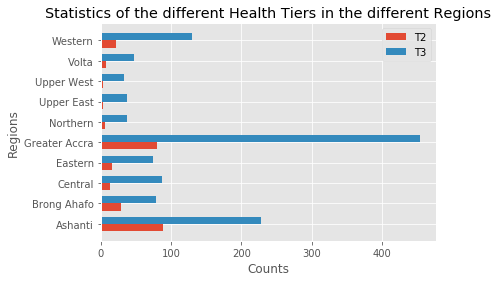

In [54]:
# Visualizing data
N = 10
arr1 = twos_array
arr2 = threes_array

ind = np.arange(N) 
width = 0.35       
plt.barh(ind, arr1, width, label='T2')
plt.barh(ind + width, arr2, width,
    label='T3')

plt.xlabel('Counts')
plt.ylabel('Regions')
plt.title('Statistics of the different Health Tiers in the different Regions')

plt.yticks(ind + width / 2, region_names)
plt.legend(loc='best')
plt.show()

## Problem
**According to the first and third bar charts, there are a greater number of health facilities in the southern part of Ghana than in the 3 northern regions.**

## Solution
**More health facilities should be built in the northern part of Ghana to cater for the health needs of people living there.**